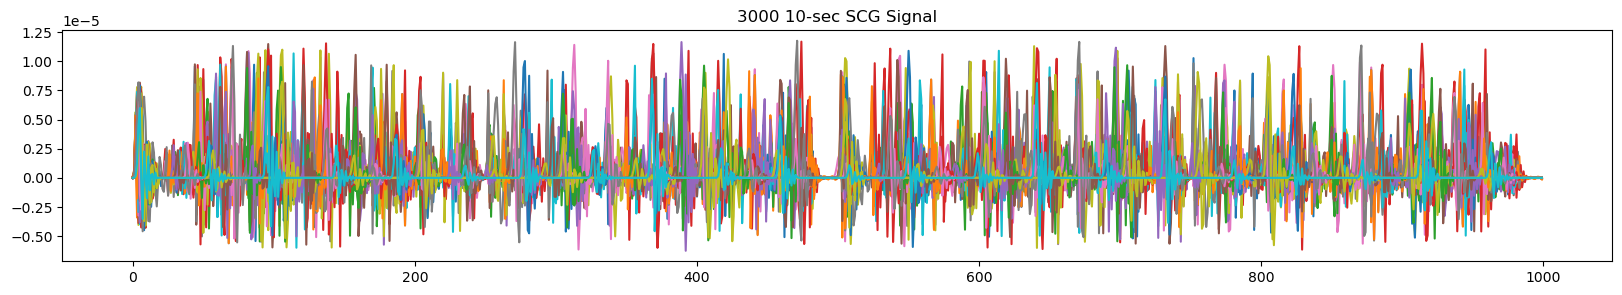

In [62]:
import tsfel
import random
import numpy as np
import pandas as pd
from tsfresh import extract_features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import sklearn.metrics as sm

fs = 100
duration = 10
N = 3000

file_path = '/Users/racheldong/Desktop/Re_Ke/simulator/simulated_dataset.csv'

column_names = [str(i) for i in range(1, duration*fs+1)] + ['heart_rate', 'respiratory_rate', 'systolic', 'diastolic']
df = pd.read_csv(file_path, header=None, names=column_names)
# print(df)


dat = np.array(df)
plt.figure(figsize=(20,3))
plt.plot(np.transpose(dat[:50,:duration*fs]))
plt.title(str(N)+" 10-sec SCG Signal")
plt.show()

In [63]:
split_index = int(0.7 * len(df))
train_set = df[:split_index]
test_set = df[split_index:]

In [64]:
signal = train_set.iloc[:, :-4]
X = signal.values
response = train_set.iloc[:, -4] #set response as heart rate

# X_train, X_test, y_train, y_test = train_test_split(signal, response, test_size=0.3, random_state=42)

In [65]:
column_id = signal.columns.tolist()
# print(X_train)

cfg = tsfel.get_features_by_domain()
feature = tsfel.time_series_features_extractor(cfg, X)

*** Feature extraction started ***


/var/folders/xc/kfk35vpj1_x543pqplxyym9w0000gn/T/ipykernel_1268/3089795203.py:5: UserWarning: Using default sampling frequency set in configuration file.
  feature = tsfel.time_series_features_extractor(cfg, X)



*** Feature extraction finished ***


In [66]:
targets = train_set[['respiratory_rate', 'systolic', 'diastolic']].copy()
targets.index = range(len(targets))

feature = pd.concat([feature,targets],axis=1,ignore_index=False)
feature

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate,respiratory_rate,systolic,diastolic
0,1.887113e-09,0.000003,1.887113e-09,4.402608,200.0,800.0,-1.253240e-08,1.456851e-07,0.001,0.002,...,1.899670e-12,2.016709e-12,1.884352e-12,1.534041e-12,1.224065e-12,1.071784e-12,517.0,18.0,116.0,77.0
1,8.447471e-10,0.000002,8.447471e-10,4.349928,200.0,800.0,-1.727547e-09,6.079821e-08,0.001,0.002,...,8.747667e-13,8.854605e-13,9.001017e-13,8.364179e-13,6.985518e-13,5.510491e-13,479.0,15.0,102.0,90.0
2,1.490593e-09,0.000003,1.490593e-09,4.022553,200.0,800.0,-3.101526e-09,1.012200e-07,0.001,0.002,...,1.397772e-12,1.437073e-12,1.455361e-12,1.344706e-12,1.123245e-12,8.908061e-13,487.0,12.0,95.0,100.0
3,2.742487e-09,0.000005,2.742487e-09,4.719108,200.0,800.0,-6.737149e-09,2.832377e-07,0.001,0.002,...,4.224305e-12,4.269624e-12,4.507272e-12,4.743911e-12,4.681388e-12,4.288877e-12,428.0,16.0,114.0,71.0
4,1.997002e-09,0.000003,1.997002e-09,4.319945,200.0,800.0,-1.551077e-08,1.873730e-07,0.001,0.002,...,2.085751e-12,2.235703e-12,2.165796e-12,1.809663e-12,1.421304e-12,1.186419e-12,513.0,11.0,127.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2.097383e-09,0.000004,2.097383e-09,4.586697,200.0,800.0,-1.424307e-08,1.892732e-07,0.001,0.002,...,2.320164e-12,2.513789e-12,2.541120e-12,2.196283e-12,1.701474e-12,1.318267e-12,531.0,30.0,115.0,96.0
2096,5.030947e-10,0.000002,5.030947e-10,4.702300,200.0,800.0,-8.521624e-09,5.763742e-08,0.001,0.002,...,5.542209e-13,6.288777e-13,6.900171e-13,6.800147e-13,6.075912e-13,5.244353e-13,465.0,30.0,105.0,82.0
2097,2.320413e-09,0.000004,2.320413e-09,4.636425,200.0,800.0,-1.330206e-08,1.494786e-07,0.001,0.002,...,2.602834e-12,2.782596e-12,2.874031e-12,2.655465e-12,2.248773e-12,1.894956e-12,537.0,10.0,105.0,76.0
2098,1.342452e-09,0.000003,1.342452e-09,4.769842,200.0,800.0,-1.663542e-09,5.532995e-08,0.001,0.002,...,1.592307e-12,1.604570e-12,1.614900e-12,1.654342e-12,1.723349e-12,1.772417e-12,473.0,15.0,102.0,100.0


In [67]:
lasso = Lasso(alpha=0.1) 
lasso.fit(feature, response)

selected_features = feature.columns[lasso.coef_ != 0]
X_train_selected = feature[selected_features]
X_train_selected

/Users/racheldong/opt/anaconda3/envs/tensorflow_env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.140e+03, tolerance: 1.755e+02
  model = cd_fast.enet_coordinate_descent(


,0_Histogram_4,0_Histogram_5,0_Kurtosis,0_MFCC_0,0_MFCC_1,0_MFCC_10,0_MFCC_11,0_MFCC_2,0_MFCC_3,0_MFCC_4,...,0_Median frequency,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Power bandwidth,0_Spectral positive turning points,0_Spectral roll-off,0_Zero crossing rate,respiratory_rate,systolic
0,444.0,556.0,19.581050,-66.398258,-24.372578,128.700049,205.868203,-37.289856,12.142188,39.330558,...,30.260521,269.0,47.0,269.0,43.2,140.0,48.196393,517.0,18.0,116.0
1,452.0,548.0,20.465319,-55.312190,-57.439157,137.254172,224.048332,21.004754,-47.074262,47.773998,...,28.056112,239.0,39.0,240.0,36.0,65.0,47.995992,479.0,15.0,102.0
2,397.0,603.0,12.451733,-60.505711,-28.309115,158.672874,178.377709,-30.991147,27.513741,17.329759,...,27.855711,263.0,39.0,263.0,44.0,75.0,47.895792,487.0,12.0,95.0
3,420.0,580.0,16.517858,38.192844,-220.935556,98.214702,87.544829,68.705914,-48.619744,-21.970966,...,17.034068,224.0,33.0,224.0,27.4,100.0,35.771543,428.0,16.0,114.0
4,439.0,561.0,17.636500,-59.804938,-43.699784,119.096242,170.915003,-30.831338,1.487497,57.157967,...,27.655311,271.0,45.0,272.0,43.5,99.0,48.396794,513.0,11.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,438.0,562.0,18.397311,-53.815235,-53.686435,113.861104,200.963335,-0.071905,-18.412731,64.459986,...,27.354709,280.0,43.0,281.0,41.7,114.0,47.795591,531.0,30.0,115.0
2096,451.0,549.0,25.447120,-36.478888,-89.909133,116.673070,147.922497,-0.688394,74.938162,-7.651866,...,28.056112,246.0,39.0,246.0,44.1,77.0,48.096192,465.0,30.0,105.0
2097,431.0,569.0,17.803905,-45.756921,-69.010625,127.715000,99.558648,11.837179,-33.785837,66.565630,...,25.150301,282.0,41.0,283.0,39.9,98.0,46.492986,537.0,10.0,105.0
2098,442.0,558.0,21.043609,-35.408608,-94.977326,137.253397,121.697224,39.889401,-60.502231,102.331737,...,23.246493,255.0,25.0,255.0,38.9,117.0,44.088176,473.0,15.0,102.0


In [68]:
# MAE for training data
MAE_trainS=sm.mean_absolute_error(results_table_train.train_true,results_table_train.train_predicted)

# MAE for test data
MAE_testS=sm.mean_absolute_error(results_table_test.test_true,results_table_test.test_predicted)



NameError: name 'results_table_train' is not defined

In [ ]:
model = network(lr = 0.001).forward(X_train_selected)
history=model.fit(X_train_selected, response, batch_size = 16, epochs=100,verbose=1, validation_split=0.1, shuffle=True)

Predictions_train=model.predict(X_train_selected)
Predictions_test=model.predict(X_test_reshape)

results_table_train = pd.DataFrame({'train_true':y_train, 'train_predicted':Predictions_train[:,0]},
                                   columns = ['train_true','train_predicted'])
results_table_test = pd.DataFrame({'test_true':y_test, 'test_predicted':Predictions_test[:,0]}, 
                             columns = ['test_true','test_predicted'])

results_table_train_sorted = results_table_train.sort_values('train_true')
results_table_train_sorted = results_table_train_sorted.reset_index(drop = True)

results_table_test_sorted = results_table_test.sort_values('test_true')
results_table_test_sorted = results_table_test_sorted.reset_index(drop = True)
print(results_table_test_sorted)